In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_img, train_labels), (test_img, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:

train_img = train_img / 255.0
test_img = test_img / 255.0

In [4]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [6]:
model.fit(train_img, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4976 - accuracy: 0.8270
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3742 - accuracy: 0.8654
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3347 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3107 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2936 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2779 - accuracy: 0.8978
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2660 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2558 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2468 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.238

In [7]:
test_loss, test_acc = model.evaluate(test_img, test_labels)
print("accuracy of tessting: ",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3436 - accuracy: 0.8804
accuracy of tessting:  0.8804000020027161


In [8]:
predictions = model.predict(test_img)


313/313 [==============================] - 1s 2ms/step


In [9]:
predicted_labels = np.argmax(predictions, axis=1)


In [10]:
num_rows = 5
num_cols = 5
num_imgs = num_rows*num_cols

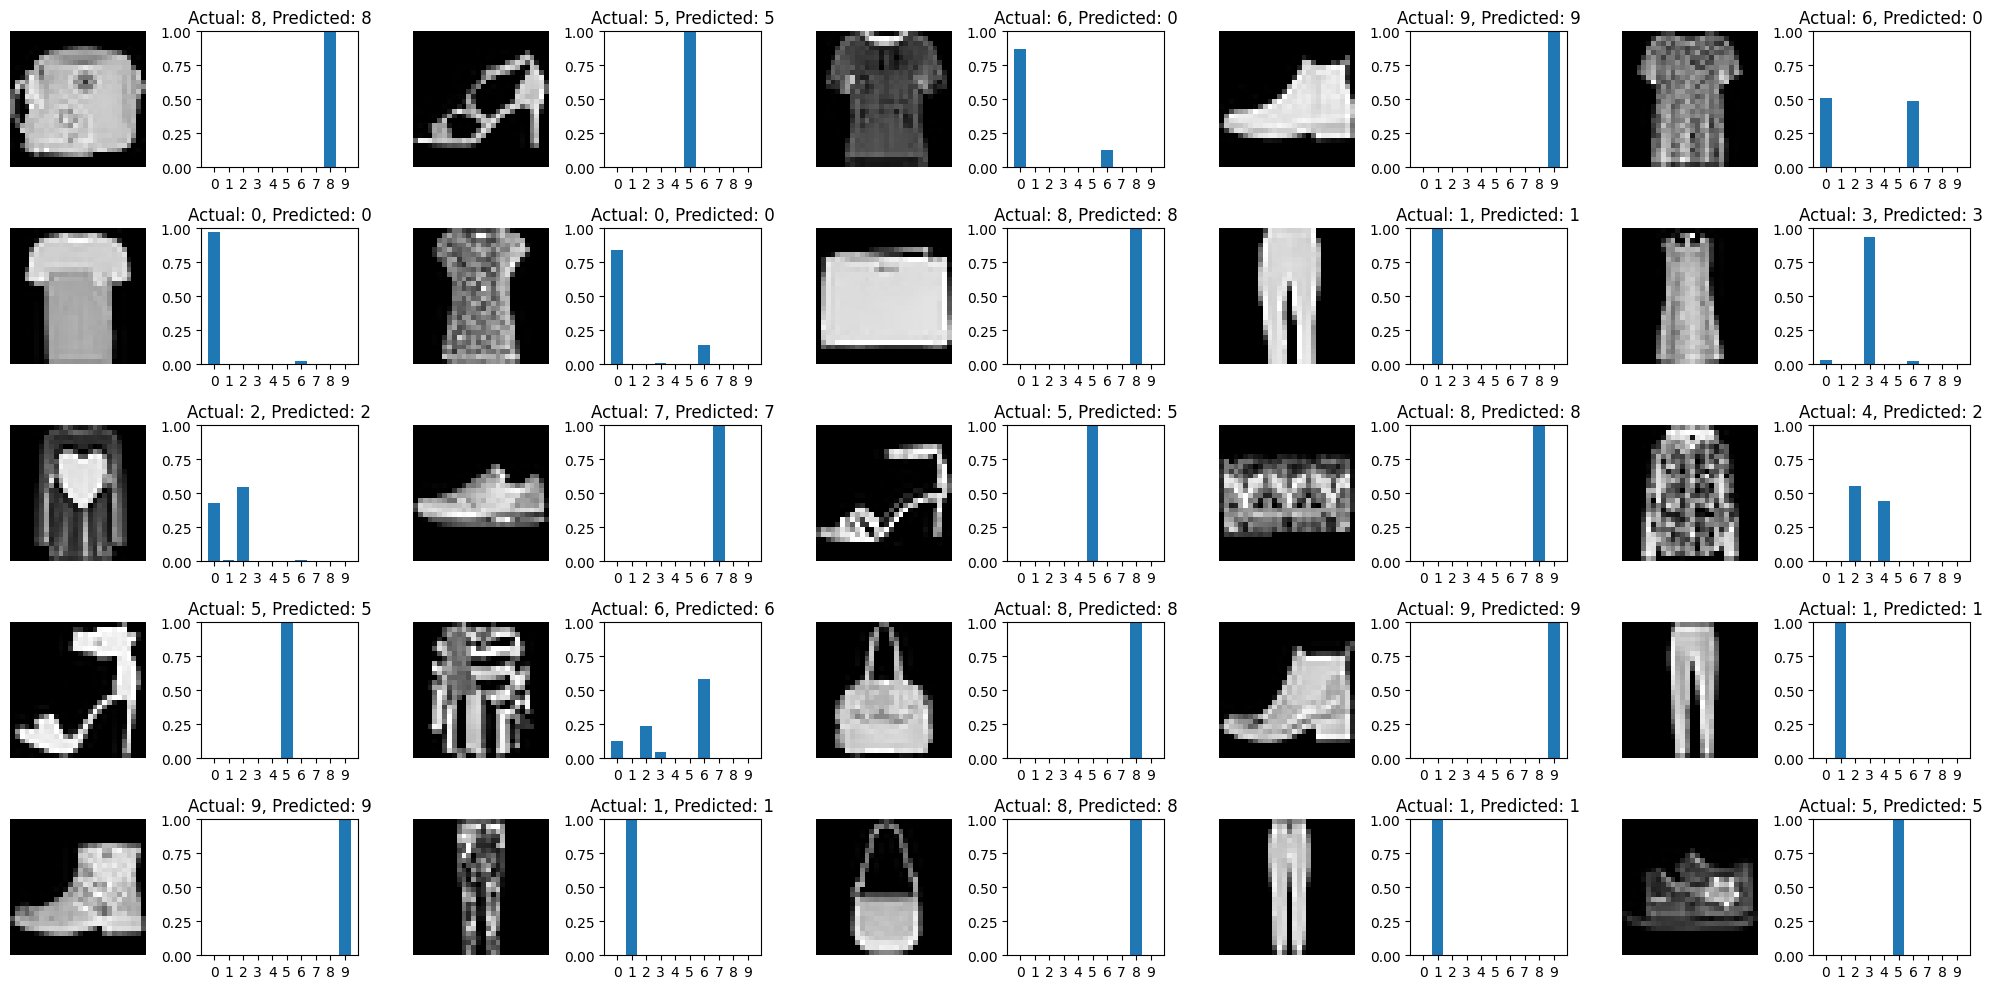

In [14]:


last_start_idx = len(test_img) - num_imgs
last_end_idx = len(test_img)

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_imgs):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.imshow(test_img[last_start_idx + i], cmap='gray')
    plt.axis("off")
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plt.bar(range(10), predictions[last_start_idx + i])
    plt.xticks(range(10))
    plt.ylim([0, 1])
    plt.tight_layout()
    plt.title(f"Actual: {test_labels[last_start_idx + i]}, Predicted: {np.argmax(predictions[last_start_idx + i])}")
plt.show()